In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD

C:\Users\nikit\PycharmProjects\test\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [85]:
model = BayesianNetwork([("IGM","GIP"),
                         ("GIP","GPIS"),
                         ("GSIP","PPAS"),
                         ("PPAS","TF"),
                         ("CI","TF"),
                         ("TF","GPIS"),
                         ("RP","GPIS")
                        ])

In [86]:
IGM = TabularCPD("IGM",3, [[0.6],[0.25],[0.15]])

GIP = TabularCPD(
    "GIP",
    2,
    [
        [0.9, 0.5, 0.2],
        [0.1, 0.5, 0.8],
    ],
    evidence=["IGM"],
    evidence_card=[3],
)

GSIP = TabularCPD("GSIP",2, [[0.9],[0.1]])

PPAS = TabularCPD(
    "PPAS",
    2,
    [
        [0.8, 0.3],
        [0.2, 0.7],
    ],
    evidence=["GSIP"],
    evidence_card=[2],
)

CI = TabularCPD("CI",2, [[0.94],[0.06]])

RP = TabularCPD("RP",2, [[0.53],[0.47]])

TF = TabularCPD(
    "TF",
    2,
    [
        [0.97, 0.76, 0.75, 0.43],
        [0.03, 0.24, 0.25, 0.57],
    ],
    evidence=["PPAS", "CI"],
    evidence_card=[2,2],
)

In [98]:
GPIS = TabularCPD(
    "GPIS",
    2,
    [
        [0.99, 0.96, 0.9, 0.63, 0.65, 0.55, 0.4, 0.18],
        [0.01, 0.04, 0.1, 0.37, 0.35, 0.45, 0.6, 0.82],
    ],
    evidence=["GIP", "TF", "RP"],
    evidence_card=[2,2,2],
)
print(GPIS)

+---------+--------+--------+--------+--------+--------+--------+--------+--------+
| GIP     | GIP(0) | GIP(0) | GIP(0) | GIP(0) | GIP(1) | GIP(1) | GIP(1) | GIP(1) |
+---------+--------+--------+--------+--------+--------+--------+--------+--------+
| TF      | TF(0)  | TF(0)  | TF(1)  | TF(1)  | TF(0)  | TF(0)  | TF(1)  | TF(1)  |
+---------+--------+--------+--------+--------+--------+--------+--------+--------+
| RP      | RP(0)  | RP(1)  | RP(0)  | RP(1)  | RP(0)  | RP(1)  | RP(0)  | RP(1)  |
+---------+--------+--------+--------+--------+--------+--------+--------+--------+
| GPIS(0) | 0.99   | 0.96   | 0.9    | 0.63   | 0.65   | 0.55   | 0.4    | 0.18   |
+---------+--------+--------+--------+--------+--------+--------+--------+--------+
| GPIS(1) | 0.01   | 0.04   | 0.1    | 0.37   | 0.35   | 0.45   | 0.6    | 0.82   |
+---------+--------+--------+--------+--------+--------+--------+--------+--------+


In [99]:
model.add_cpds(IGM, GIP, GPIS, GSIP, PPAS, TF, CI, RP)
model.check_model()

True

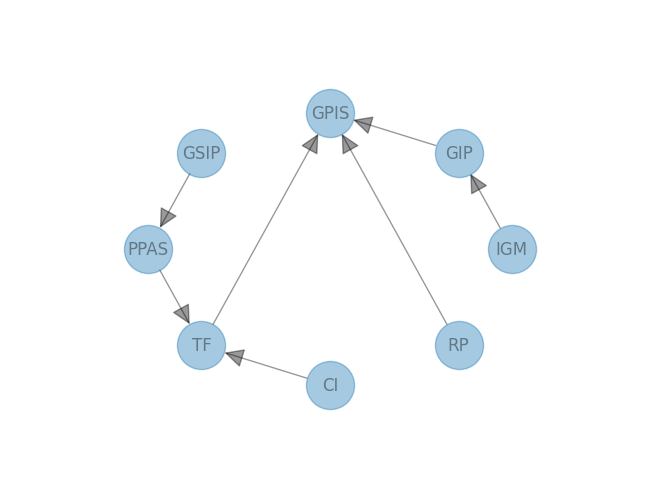

In [100]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw_circular(
    model, with_labels=True, arrowsize=30, node_size=1200, alpha=0.4
)
plt.margins(0.3)
plt.show()

In [104]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

posterior_Genre = infer.query(['GIP'], evidence={'GPIS': 1, 'IGM': 0})
print(posterior_Genre)

+--------+------------+
| GIP    |   phi(GIP) |
+========+============+
| GIP(0) |     0.4822 |
+--------+------------+
| GIP(1) |     0.5178 |
+--------+------------+


In [105]:
infer2 = VariableElimination(model)

posterior_Trust = infer.query(['TF'], evidence={'CI': 0, 'PPAS': 1})
print(posterior_Trust)

+-------+-----------+
| TF    |   phi(TF) |
+=======+===========+
| TF(0) |    0.7500 |
+-------+-----------+
| TF(1) |    0.2500 |
+-------+-----------+


In [ ]:
IGM - Interesting game
GIP - Genre is popular
GPIS - Game project is successful
GSIP - Game studio is popular
PPAS - Previous projects are successful
TF - Trust factor
RP - Game`s MSRP
CI - Considerable investments

    В качестве модели исследования выбраны факторы, влияющие на разработку компьютерной игры. Узлами БСД выступают
вышеперечисленные характеристики. Были заданы вероятностные значения событий, а также построены связи между узлами.
Были сделаны прогнозы постериорных вероятностей наступления событий. Переменная posterior_Genre определяет вероятность того,
что выбранный жанр игры популярен, при условии, что игра стала успешной, при этом не включая в себя интересных игровых механик.
Переменная posterior_Trust определяет фактор доверия к разрабатываемому продукту, при условии, что в проект не вкладываются
значительные суммы, однако у студии, занимающейся разработкой игры, имеются успешные проекты.
